In [137]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Extracting data from downloaded files

In [46]:
from src.data_wrangling import *
import matplotlib.pyplot as plt

In [47]:
data_dir = 'CLA Datasets'
save_as = 'dataset_CLA_nonaugmented.pkl'

create_dataset(data_dir,save_as)

Reading CLA Datasets\CLA-SubjectJ-170504-3St-LRHand-Inter.mat

Reading CLA Datasets\CLA-SubjectJ-170508-3St-LRHand-Inter.mat

Error Reading CLA Datasets\CLA-SubjectJ-170508-3St-LRHand-Inter.mat

Reading CLA Datasets\CLA-SubjectJ-170510-3St-LRHand-Inter.mat

Error Reading CLA Datasets\CLA-SubjectJ-170510-3St-LRHand-Inter.mat

Reading CLA Datasets\CLASubjectA1601083StLRHand.mat

Reading CLA Datasets\CLASubjectB1510193StLRHand.mat

Reading CLA Datasets\CLASubjectB1510203StLRHand.mat

Reading CLA Datasets\CLASubjectB1512153StLRHand.mat

Reading CLA Datasets\CLASubjectC1511263StLRHand.mat

Reading CLA Datasets\CLASubjectC1512163StLRHand.mat

Reading CLA Datasets\CLASubjectC1512233StLRHand.mat

Reading CLA Datasets\CLASubjectD1511253StLRHand.mat

Reading CLA Datasets\CLASubjectE1512253StLRHand.mat

Reading CLA Datasets\CLASubjectE1601193StLRHand.mat

Reading CLA Datasets\CLASubjectE1601223StLRHand.mat

Reading CLA Datasets\CLASubjectF1509163StLRHand.mat

Reading CLA Datasets\CLASubjectF15091

### Technical Validation

Plotting left and right hand motor imagery for one of the subjects shown in the study and making sure that ERP curve has same form. Instructions for how these plots were generated on page 9 of Kaya et al. 

Only testing one one, getting from signal onset to 1.5 seconds after.

In [2]:
from src.data_wrangling import *
from src.dataset_wrappers import *
from src.preprocessing import *

In [3]:
#SubjectE-151225
trials_val,labels_val = technical_validation_dataset = load_dataset('Technical Validation Data.pkl')

In [4]:
marker_dict = {
    1:'left',
    2:'right'
}

#Organizing the whole list of signals into left and right into each entry of the dictionary, and then also a seperate dict for ERP curve we plot after
group_dict,averaged_group_dict = organize_into_groups(marker_dict,trials_val,labels_val,average_signals=True)

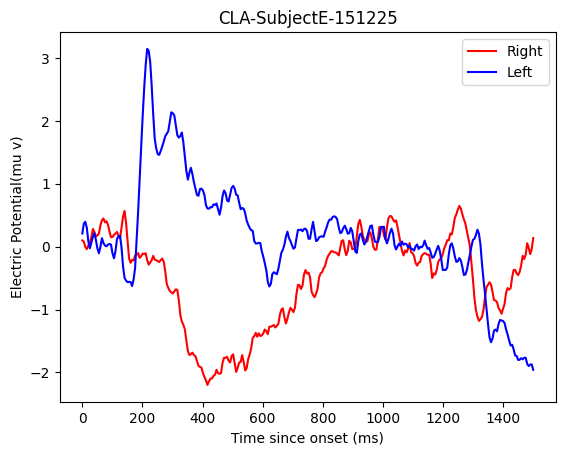

In [5]:
subject_name = 'CLA-SubjectE-151225'

t = np.linspace(start=0,stop=1500,num=300)
plt.plot(t,averaged_group_dict['right'][0],color='red')
plt.plot(t,averaged_group_dict['left'][0],color='blue')

plt.xlabel('Time since onset (ms)')
plt.ylabel('Electric Potential(mu v)')

plt.legend(['Right','Left'])

plt.title(subject_name);

Done from signal onset to 1.5 seconds after. Range is +/- 3 microvolts for channel C3, as mentioned by study. Can compare the above figure with the figure on page 9 for mentiond subject directly. 

General form matches for the above subject. Data parsing seems to have been done correctly. 

### Power Spectrum for above ERP Curve

In [6]:
from scipy.signal import periodogram

In [7]:
#Just doing C3 for technical validation to compare with Kaya et. al
psd_right = periodogram(averaged_group_dict['right'][0],fs=200)
psd_left = periodogram(averaged_group_dict['left'][0],fs=200)

In [8]:
data_indices = psd_right[0]

mu_start = np.argmax(data_indices >= 8)
mu_end = np.argmax(data_indices >= 13)

relevant_indices = data_indices[mu_start:mu_end]

relevant_data_right = psd_right[1][mu_start:mu_end]
relevant_data_left = psd_left[1][mu_start:mu_end]

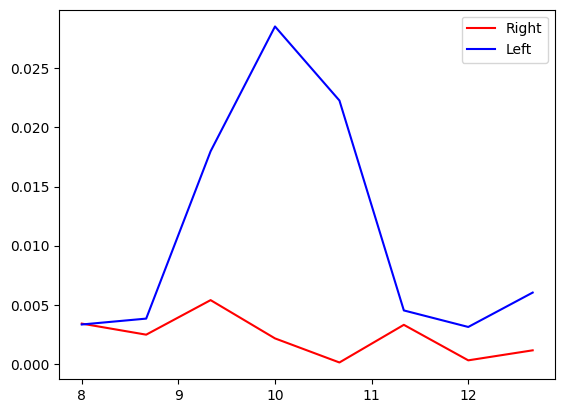

In [9]:
plt.plot(relevant_indices,relevant_data_right,color='red');
plt.plot(relevant_indices,relevant_data_left,color='blue');

plt.legend(['Right','Left']);

### Auto-Encoder Pre-Training

In [177]:
from src.models.CAE import ConvolutionalAutoEncoder
import tensorflow as tf
import os

import matplotlib.pyplot as plt
import numpy as np

In [178]:
dataset_path = 'dataset_CLA_nonaugmented.pkl'
TRAINING_SETTINGS_JSON = 'TRAINING_SETTINGS/auto_encoder_pre_training/test.json'

CAE = ConvolutionalAutoEncoder(dataset_path,TRAINING_SETTINGS_JSON)

In [179]:
CAE.TRAINING_SETTINGS

{'KERNEL_WIDTH': 16,
 'LATENT_DIMS': 8,
 'learning_rate': 1e-05,
 'NUM_AUTO_ENCODER_LAYERS': 2,
 'NUM_INITIAL_KERNELS': 8,
 'DROPOUT_RATE': 0.3,
 'STRIDE_LENGTH': 2,
 'BATCH_SIZE': 32,
 'NUM_EPOCHS': 30,
 'CLIP_GRADIENTS': 'False'}

In [180]:
CAE.DATA_FORMAT

{'NUM_CHANNELS': 2, 'TRIAL_LENGTH': 170}

In [181]:
CAE.build_encoder(show_summary=True)

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 1, 78, 8)          264       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 1, 39, 8)          0         
 ng2D)                                                           
                                                                 
 reshape_42 (Reshape)        (None, 39, 8)             0         
                                                                 
 batch_normalization_42 (Ba  (None, 39, 8)             32        
 tchNormalization)                                               
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 39, 8)             0         
                                                                 
 conv1d_14 (Conv1D)          (None, 12, 16)          

In [182]:
CAE.build_decoder()

In [183]:
CAE.build_auto_encoder(show_summary=True)

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 1, 78, 8)          264       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 1, 39, 8)          0         
 ng2D)                                                           
                                                                 
 reshape_45 (Reshape)        (None, 39, 8)             0         
                                                                 
 batch_normalization_45 (Ba  (None, 39, 8)             32        
 tchNormalization)                                               
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 39, 8)             0         
                                                                 
 conv1d_15 (Conv1D)          (None, 12, 16)          

In [184]:
CAE.get_training_points_per_param()

For each model parameter, there are 1.970697012802276 training examples when considering drop out during training


In [185]:
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

#learning rate set automatically in this funciton, read from training settings json
CAE.compile_auto_encoder(loss,optimizer)

In [186]:
CAE.train()

Training steps per epoch: ~217



  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

  0%|          | 0/217 [00:00<?, ? batch/s]

In [187]:
ratios = np.array(list(CAE.models_per_epoch.values()))[:,1]

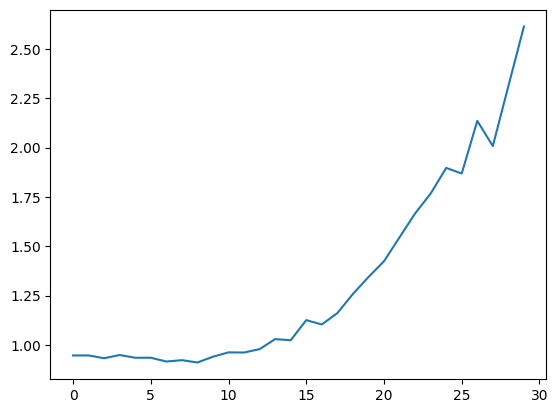

In [188]:
plt.plot(ratios)

7.931055 4.715468


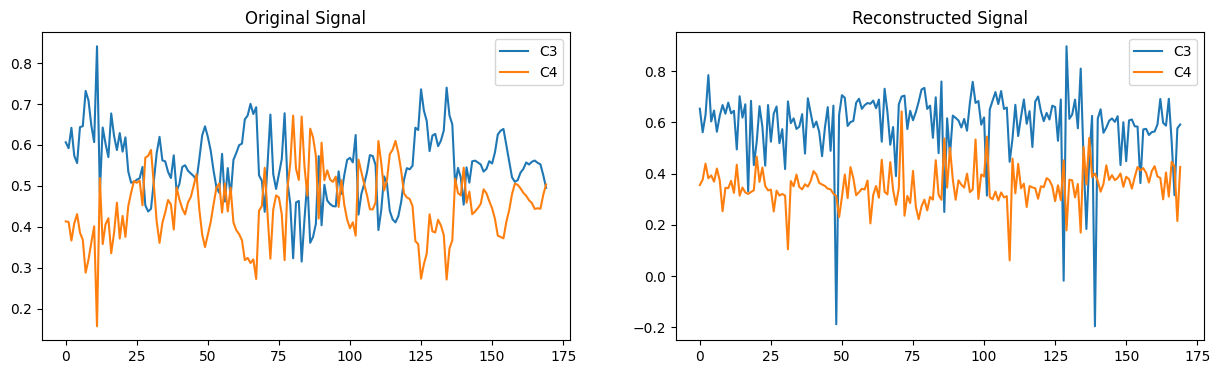

In [193]:
CAE.auto_encoder = CAE.models_per_epoch['Epoch 17'][0]
CAE.show_random_reconstruction()